In [93]:
import lithops
from lithops import Storage
from matplotlib import pyplot as plt
import math
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
storage = Storage()

In [94]:

csv = storage.get_object('2021sdvictor', 'densitatPerPIB.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',')
#showing data
x = df['DENSITAT']
y = df['PIB_CAPITA']
plt.scatter(x,y,label="PIB per capita i densitat", color="blue", marker=".", s=30)
plt.xlabel('Densitat')
plt.ylabel('PIB per capita')
plt.title('PIB per capita segons densitat de població de comarca')
plt.legend()
plt.plot(x,p(x),"r--")
plt.show()

NameError: name 'p' is not defined

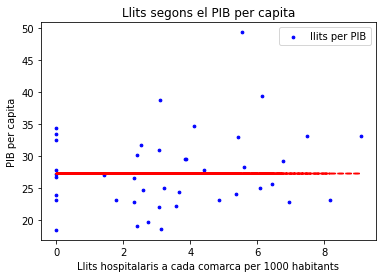

In [64]:
csv = storage.get_object('2021sdvictor', 'llitsPerPIB.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',')
#showing data
x = df['LLITS_1000_HAB']
y = df['PIB_CAPITA']
plt.scatter(x,y,label="llits per PIB", color="blue", marker=".", s=30)
plt.xlabel('Llits hospitalaris a cada comarca per 1000 habitants')
plt.ylabel('PIB per capita')
plt.title('Llits segons el PIB per capita')
plt.legend()
plt.plot(x,p(x),"r--")
plt.show()

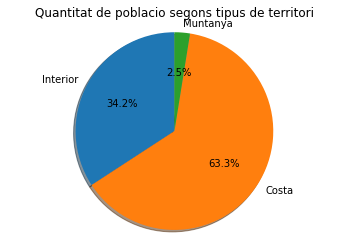

In [92]:
csv = storage.get_object('2021sdvictor', 'habitantsPerTipusComarca.csv')
#formatting csv
s=str(csv,'latin-1')
data = StringIO(s) 
df=pd.read_csv(data,header=0,delimiter=',')
#showing data
muntanya = 0
platja = 0
interior = 0
i = 0
total = 0
for h in df['HABITANTS']:
    if df['TIPUS_COMARCA'][i] == 'Interior':
        interior = interior + h
    if df['TIPUS_COMARCA'][i] == 'Costa':
        platja = platja + h
    if df['TIPUS_COMARCA'][i] == 'Muntanya':
        muntanya = muntanya + h
    total = total + h
    i=i+1
labels = 'Interior', 'Costa', 'Muntanya'
sizes = [(interior/total)*100,(platja/total)*100,(muntanya/total)*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Quantitat de poblacio segons tipus de territori')
plt.show()

                 COMARCA        DATA  POSITIUS
194             ALT CAMP  18/09/2020         4
522          ALT EMPORDA  18/09/2020        13
850          ALT PENEDES  18/09/2020         6
1178          ALT URGELL  18/09/2020         1
1506     ALTA RIBAGORÃA  18/09/2020         0
1834               ANOIA  18/09/2020         6
2162               BAGES  18/09/2020        31
2490           BAIX CAMP  18/09/2020        20
2818           BAIX EBRE  18/09/2020         9
3146        BAIX EMPORDA  18/09/2020        13
3474      BAIX LLOBREGAT  18/09/2020        71
3802        BAIX PENEDES  18/09/2020         7
4130          BARCELONES  18/09/2020       336
4458            BERGUEDA  18/09/2020         5
4786            CERDANYA  18/09/2020        13
5114    CONCA DE BARBERA  18/09/2020         3
5442              GARRAF  18/09/2020         9
5770           GARRIGUES  18/09/2020         0
6098            GARROTXA  18/09/2020         4
6426             GIRONES  18/09/2020        56
6754         

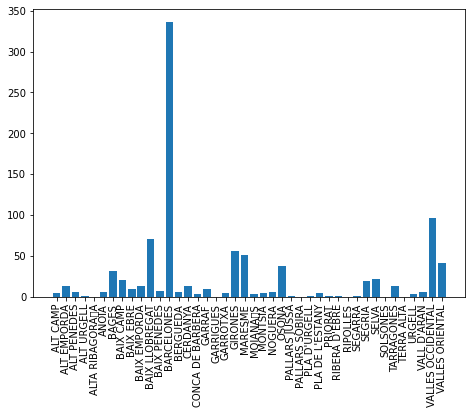

                 COMARCA        DATA  POSITIUS
194             ALT CAMP  18/09/2020         4
522          ALT EMPORDA  18/09/2020        13
850          ALT PENEDES  18/09/2020         6
1178          ALT URGELL  18/09/2020         1
1506     ALTA RIBAGORÃA  18/09/2020         0
1834               ANOIA  18/09/2020         6
2162               BAGES  18/09/2020        31
2490           BAIX CAMP  18/09/2020        20
2818           BAIX EBRE  18/09/2020         9
3146        BAIX EMPORDA  18/09/2020        13
3474      BAIX LLOBREGAT  18/09/2020        71
3802        BAIX PENEDES  18/09/2020         7
4130          BARCELONES  18/09/2020       336
4458            BERGUEDA  18/09/2020         5
4786            CERDANYA  18/09/2020        13
5114    CONCA DE BARBERA  18/09/2020         3
5442              GARRAF  18/09/2020         9
5770           GARRIGUES  18/09/2020         0
6098            GARROTXA  18/09/2020         4
6426             GIRONES  18/09/2020        56
6754         

In [98]:
#csv = storage.get_object('2021sdvictor', 'positiusEntre15i64Anys.csv')
#formatting csv
#s=str(csv,'latin-1')
#data = StringIO(s) 
df=pd.read_csv('positiusEntre15i64Anysv2.csv',header=0,delimiter=',') #SOLO PARA PRUEBAS EN LOCAL
#showing data
data = "18/09/2020"
result = df.loc[df['DATA'] == data]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(result)
ax.bar(result['COMARCA'],result['POSITIUS'])
plt.xticks(rotation=90)
plt.show()
print(result)

<ipython-input-96-62f8688f19d8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['DATA'] = pd.to_datetime(result['DATA'])


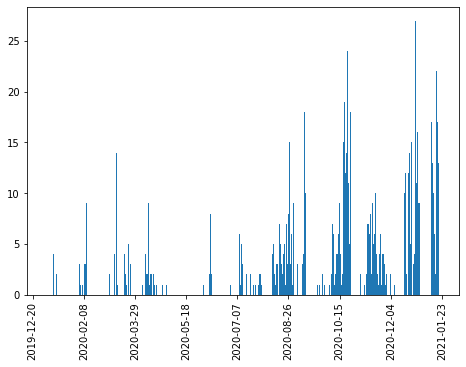

In [96]:
#csv = storage.get_object('2021sdvictor', 'positiusEntre15i64Anys.csv')
#formatting csv
#s=str(csv,'latin-1')
#data = StringIO(s) 
df=pd.read_csv('positiusEntre15i64Anysv2.csv',header=0,delimiter=',') #SOLO PARA PRUEBAS EN LOCAL
#showing data
comarca = "ALT CAMP"
result = df.loc[df['COMARCA'] == comarca]
result['DATA'] = pd.to_datetime(result['DATA'])
result = result.sort_values(by='DATA')
result = result.head(315)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(result['DATA'],result['POSITIUS'])
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

      Unnamed: 0        DATA  CODI_CENTRE  ALUMNES_POSITIUS_ACUM
0              9  23/09/2020      8000244                      1
1             10  23/09/2020      8000271                      1
2             13  23/09/2020      8000384                      2
3             14  23/09/2020      8000396                      1
4             16  23/09/2020      8000499                      1
...          ...         ...          ...                    ...
9425       49979  03/10/2020     17007907                      1
9426       49980  03/10/2020     17007919                      9
9427       49985  03/10/2020     17007968                      2
9428       49988  03/10/2020     17008006                      2
9429       49996  03/10/2020     17008080                      2

[9430 rows x 4 columns]
<ipython-input-87-f6b9f75b049a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

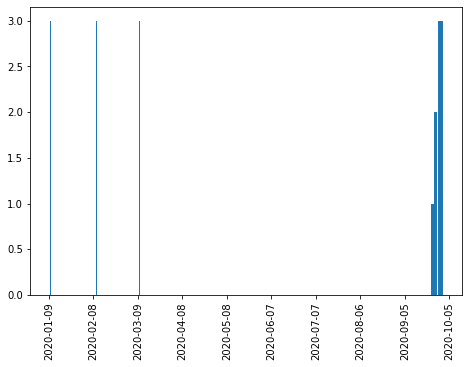

In [87]:
#csv = storage.get_object('2021sdvictor', 'evolucioCovidEducatiuPositius.csv')
#formatting csv
#s=str(csv,'latin-1')
#data = StringIO(s) 
df=pd.read_csv('evolucioCovidEducatiuPositius.csv',header=0,delimiter=',') #SOLO PARA PRUEBAS EN LOCAL
codi_centre = 8000271 
result = df.loc[df['CODI_CENTRE'] == codi_centre]
result['DATA'] = pd.to_datetime(result['DATA'])
result = result.sort_values(by='DATA')
#result = result.head(315)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(result['DATA'],result['ALUMNES_POSITIUS_ACUM'])
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

In [114]:
#csv = storage.get_object('2021sdvictor', 'evolucioCovidEducatiuPositius.csv')
#formatting csv
#s=str(csv,'latin-1')
#data = StringIO(s) 
df=pd.read_csv('evolucioCovidEducatiuPositius.csv',header=0,delimiter=',') #SOLO PARA PRUEBAS EN LOCAL
data = "23/09/2020" 
result = df.loc[df['DATA'] == data]
#result = result.head(315)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
result.CODI_CENTRE = result.CODI_CENTRE.astype(str)
ax.bar(result['CODI_CENTRE'],result['ALUMNES_POSITIUS_ACUM'])
plt.ticklabel_format(style = 'plain')
plt.show()

<ipython-input-114-781049f154f8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['CODI_CENTRE'] = result['CODI_CENTRE'].astype(str)


AttributeError: This method only works with the ScalarFormatter